In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes2.csv


# Importing the dataset

In [2]:
df = pd.read_csv("../input/diabetes-dataset/diabetes2.csv")
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Checking for columns which have missing values

In [3]:
missing_cols = [col for col in df.columns if df[col].isnull().any()]
missing_cols

[]

# Independent and dependent variables

In [4]:
X = pd.DataFrame(df.iloc[:,0:8])
y = pd.DataFrame(df.iloc[:,8])

# Splitting training and testing dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Modelling

In [6]:
clf = LogisticRegression(max_iter=250)
clf.fit(X_train, y_train['Outcome'])

LogisticRegression(max_iter=250)

# Predicting on testing dataset

In [7]:
y_test_hat = clf.predict(X_test)
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



# Confusion matrix for testing dataset

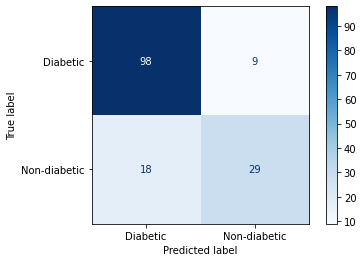

In [8]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=['Diabetic', 'Non-diabetic'],)

# Predicting on training dataset

In [9]:
y_train_hat = clf.predict(X_train)
print(classification_report(y_train,y_train_hat))

              precision    recall  f1-score   support

           0       0.78      0.87      0.83       393
           1       0.71      0.57      0.64       221

    accuracy                           0.76       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.76      0.76       614



# Confusion matrix for testing dataset

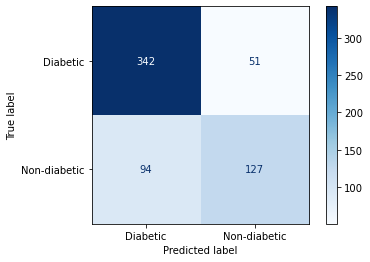

In [10]:
plot_confusion_matrix(clf, X_train, y_train, cmap=plt.cm.Blues, display_labels=['Diabetic', 'Non-diabetic'],)